In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('placement.csv')

In [3]:
df.sample(5)

,cgpa,placement_exam_marks,placed
169,6.19,16.0,1
801,6.31,14.0,0
761,8.02,6.0,0
577,6.85,24.0,1
371,5.90,29.0,0


In [4]:
df.shape

(1000, 3)

C:\Users\Alina\AppData\Local\Temp\ipykernel_15068\3792736820.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
C:\Users\Alina\AppData\Local\Temp\ipykernel_15068\3792736820.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['placement_exam_marks'])


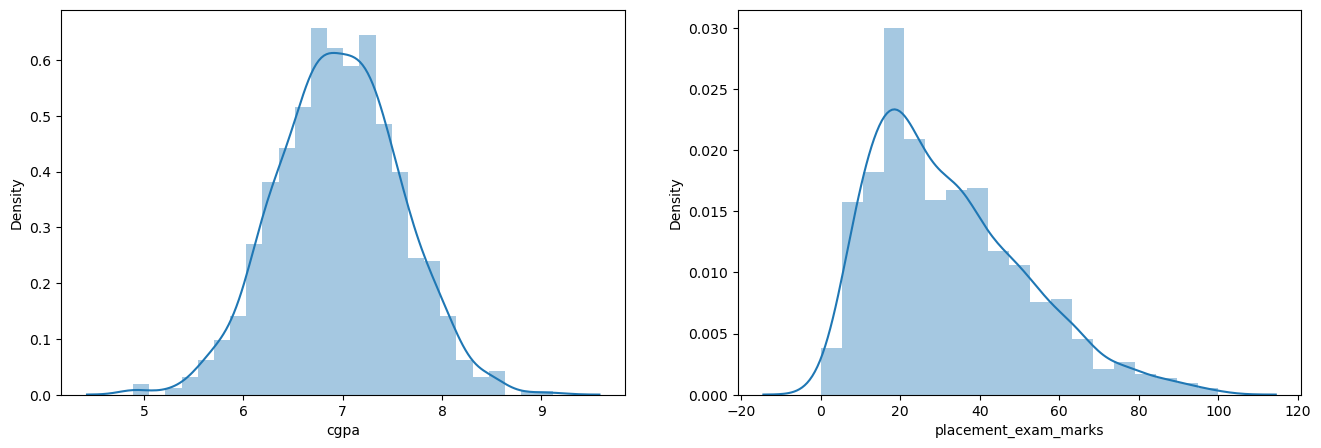

In [5]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

plt.show()

In [6]:
print('The min value in CGPA column', df['cgpa'].min())
print('The max value in CGPA column', df['cgpa'].max())
print('The max value in CGPA column', df['cgpa'].mean())
print('The max value in CGPA column', df['cgpa'].std())

The min value in CGPA column 4.89
The max value in CGPA column 9.12
The max value in CGPA column 6.96124000000001
The max value in CGPA column 0.6158978751323894


In [7]:
#finding boundary value
upper_limit=df['cgpa'].mean() + 3*df['cgpa'].std()
lowest_limit=df['cgpa'].mean() - 3*df['cgpa'].std()
print('highest boundary :',upper_limit)
print('lowest boundary :', lowest_limit)

highest boundary : 8.808933625397177
lowest boundary : 5.113546374602842


In [8]:
# Finding the outliers

df[(df['cgpa'] > upper_limit) | (df['cgpa'] <lowest_limit)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [9]:
# Trimming

new_df = df[(df['cgpa'] < 8.80) & (df['cgpa'] > 5.11)]
new_df

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
991,7.04,57.0,0
992,6.26,12.0,0
993,6.73,21.0,1
994,6.48,63.0,0


In [10]:
new_df.shape

(995, 3)

C:\Users\Alina\AppData\Local\Temp\ipykernel_15068\607522070.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
C:\Users\Alina\AppData\Local\Temp\ipykernel_15068\607522070.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df['cgpa'])


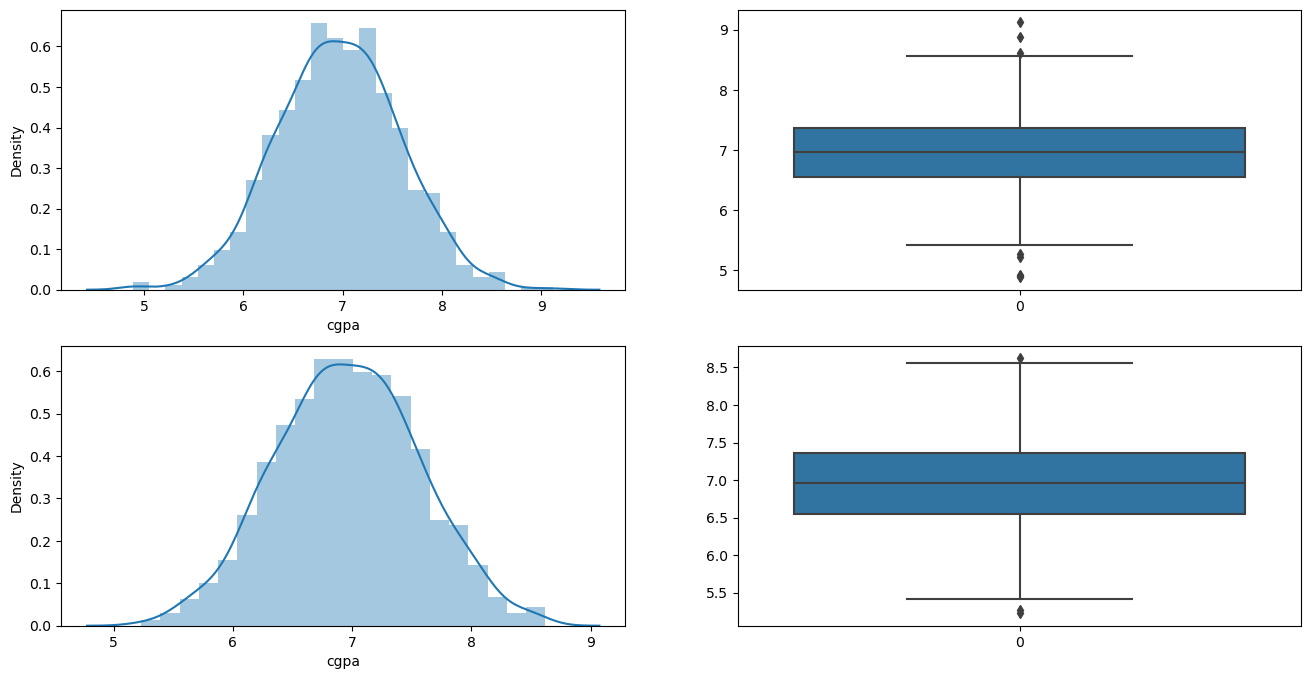

In [11]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['cgpa'])

plt.subplot(2,2,2)
sns.boxplot(df['cgpa'])

plt.subplot(2,2,3)
sns.distplot(new_df['cgpa'])

plt.subplot(2,2,4)
sns.boxplot(new_df['cgpa'])

plt.show()

In [12]:
# Approach 2

# Calculating the Zscore

df['cgpa_zscore'] = (df['cgpa'] - df['cgpa'].mean())/df['cgpa'].std()

In [13]:
df[(df['cgpa_zscore'] > 3) | (df['cgpa_zscore'] < -3)]

,cgpa,placement_exam_marks,placed,cgpa_zscore
485,4.92,44.0,1,-3.314251
995,8.87,44.0,1,3.099150
996,9.12,65.0,1,3.505062
997,4.89,34.0,0,-3.362960
999,4.90,10.0,1,-3.346724


In [14]:
# Trimming 
new_df = df[(df['cgpa_zscore'] < 3) & (df['cgpa_zscore'] > -3)]

In [15]:
new_df.shape

(995, 4)

# Second Approach Capping

In [16]:
cap_df=df.copy()
cap_df['cgpa'] = np.where(
    cap_df['cgpa']>upper_limit,
    upper_limit,
    np.where(
        cap_df['cgpa']<lowest_limit,
        lowest_limit,
        cap_df['cgpa']
    )
)

In [17]:
cap_df.shape

(1000, 4)

In [18]:
print('The min value in CGPA column', cap_df['cgpa'].min())
print('The max value in CGPA column', cap_df['cgpa'].max())

The min value in CGPA column 5.113546374602842
The max value in CGPA column 8.808933625397177


C:\Users\Alina\AppData\Local\Temp\ipykernel_15068\1108661765.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['cgpa'])
C:\Users\Alina\AppData\Local\Temp\ipykernel_15068\1108661765.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cap_df['cgpa'])


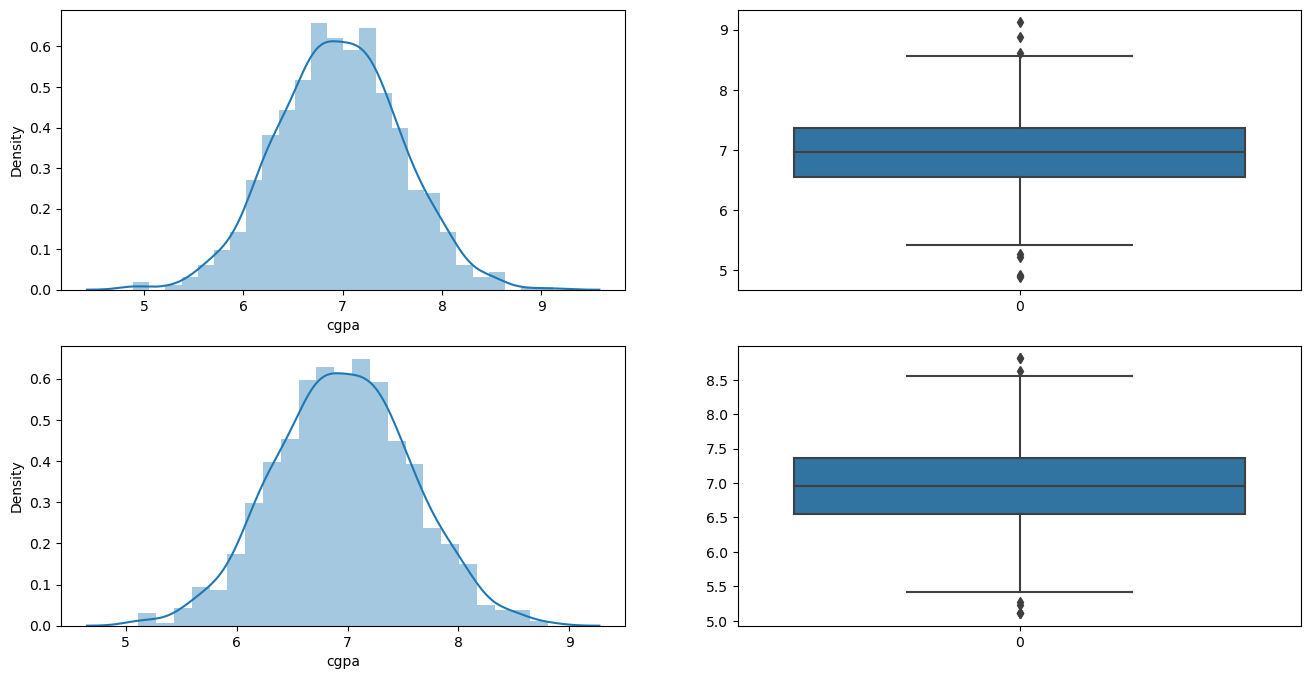

In [19]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['cgpa'])

plt.subplot(2,2,2)
sns.boxplot(df['cgpa'])

plt.subplot(2,2,3)
sns.distplot(cap_df['cgpa'])

plt.subplot(2,2,4)
sns.boxplot(cap_df['cgpa'])

plt.show()